# Weather Prediction for Miami

## Data Exploring and Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:

df = pd.read_csv('temperature.csv')
humidity_df = pd.read_csv('humidity.csv')
pressure_df = pd.read_csv('pressure.csv')
wind_speed_df = pd.read_csv('wind_speed.csv')
wind_direction_df = pd.read_csv('wind_direction.csv')


In [3]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime',inplace=True)

In [4]:
humidity_df['datetime'] = pd.to_datetime(humidity_df['datetime'])
humidity_df.set_index('datetime',inplace=True)
pressure_df['datetime'] = pd.to_datetime(pressure_df['datetime'])
pressure_df.set_index('datetime',inplace=True)
wind_speed_df['datetime'] = pd.to_datetime(wind_speed_df['datetime'])
wind_speed_df.set_index('datetime',inplace=True)
wind_direction_df['datetime'] = pd.to_datetime(wind_direction_df['datetime'])
wind_direction_df.set_index('datetime',inplace=True)

In [5]:
df.rename(columns = {'Miami': 'Temperature'},inplace = True)
df = df['Temperature']

In [6]:
df.head()

datetime
2012-10-01 12:00:00           NaN
2012-10-01 13:00:00    299.720000
2012-10-01 14:00:00    299.732518
2012-10-01 15:00:00    299.766579
2012-10-01 16:00:00    299.800641
Name: Temperature, dtype: float64

In [7]:
df = df.to_frame()
humidity_df.rename(columns = {'Miami': 'Humidity'},inplace = True)
df['Humidity'] = humidity_df['Humidity']

In [8]:
pressure_df.rename(columns = {'Miami': 'Pressure'},inplace = True)
df['Pressure'] = pressure_df['Pressure']

In [9]:
wind_speed_df.rename(columns = {'Miami': 'Wind_Speed'},inplace = True)
df['Wind_Speed'] = wind_speed_df['Wind_Speed']

In [10]:
wind_direction_df.rename(columns = {'Miami': 'Wind_Direction'},inplace = True)
df['Wind_Direction'] = wind_direction_df['Wind_Direction']

In [11]:
df.head()

,Temperature,Humidity,Pressure,Wind_Speed,Wind_Direction
datetime,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN
2012-10-01 13:00:00,299.720000,83.0,1011.0,3.0,200.0
2012-10-01 14:00:00,299.732518,82.0,1011.0,3.0,200.0
2012-10-01 15:00:00,299.766579,82.0,1011.0,3.0,200.0
2012-10-01 16:00:00,299.800641,82.0,1011.0,3.0,200.0


In [12]:
df.isnull().sum()

Temperature        805
Humidity          1087
Pressure           794
Wind_Speed         795
Wind_Direction     795
dtype: int64

In [13]:
df.fillna(method='ffill',inplace = True)

/var/folders/ss/7nc8kc8d2v93mhjl1vw4p1b80000gn/T/ipykernel_1979/4205896538.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace = True)


In [14]:
df.head()

,Temperature,Humidity,Pressure,Wind_Speed,Wind_Direction
datetime,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN
2012-10-01 13:00:00,299.720000,83.0,1011.0,3.0,200.0
2012-10-01 14:00:00,299.732518,82.0,1011.0,3.0,200.0
2012-10-01 15:00:00,299.766579,82.0,1011.0,3.0,200.0
2012-10-01 16:00:00,299.800641,82.0,1011.0,3.0,200.0


In [15]:
df.dropna(inplace = True)

## Data Visualization

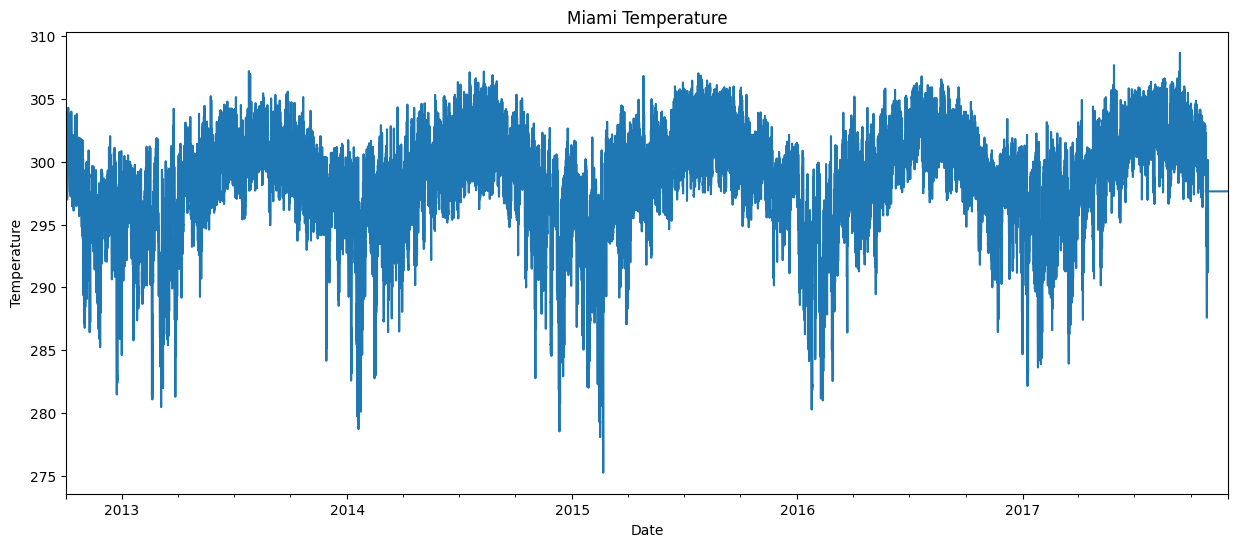

In [16]:
fig, ax = plt.subplots(figsize=(15, 6))
df['Temperature'].plot(xlabel="Date", ylabel="Temperature", title="Miami Temperature", ax=ax);

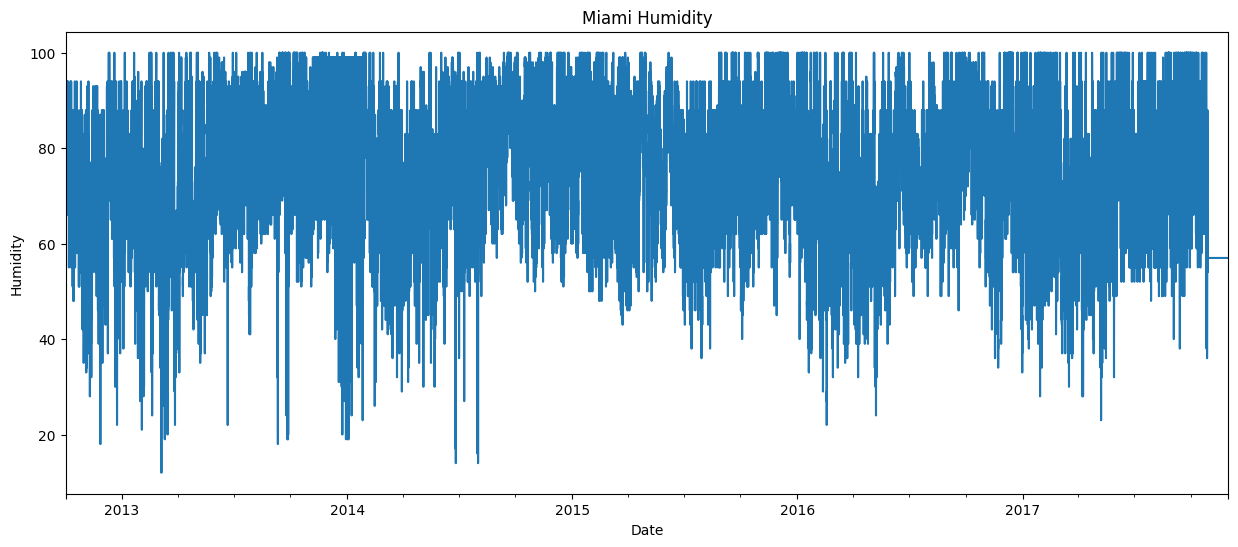

In [17]:
fig, ax = plt.subplots(figsize=(15, 6))
df['Humidity'].plot(xlabel="Date", ylabel="Humidity", title="Miami Humidity", ax=ax);

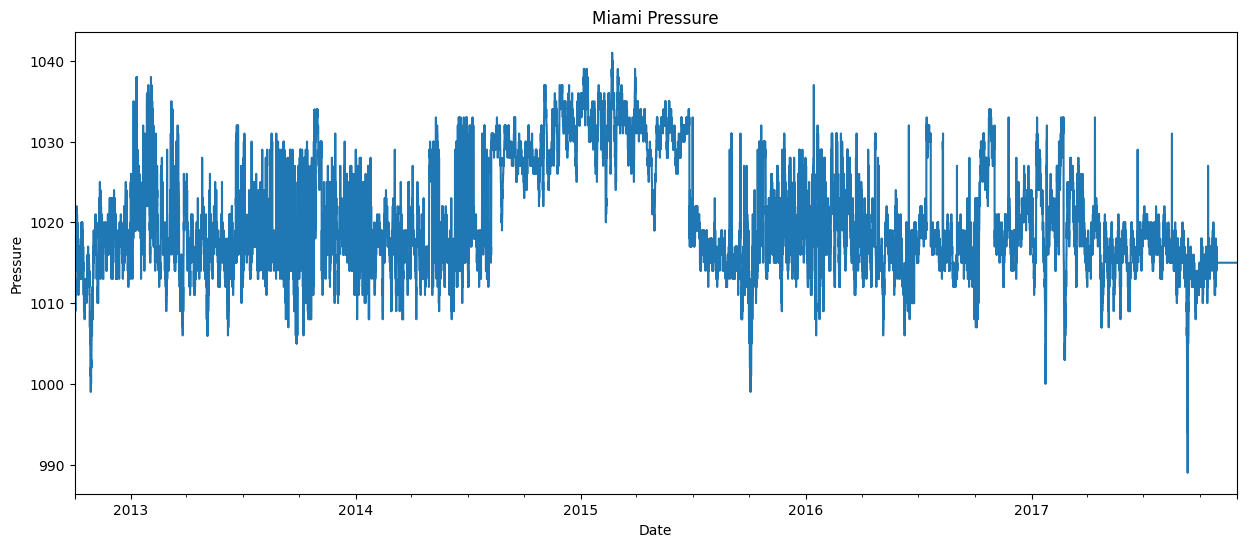

In [18]:
fig, ax = plt.subplots(figsize=(15, 6))
df['Pressure'].plot(xlabel="Date", ylabel="Pressure", title="Miami Pressure", ax=ax);

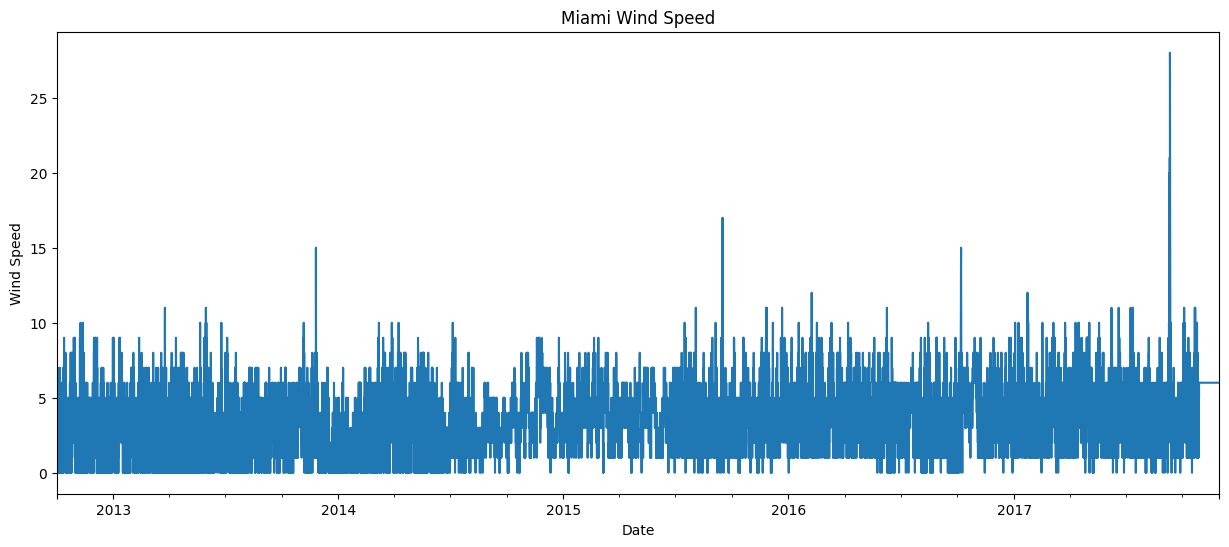

In [19]:
fig, ax = plt.subplots(figsize=(15, 6))
df['Wind_Speed'].plot(xlabel="Date", ylabel="Wind Speed", title="Miami Wind Speed", ax=ax);

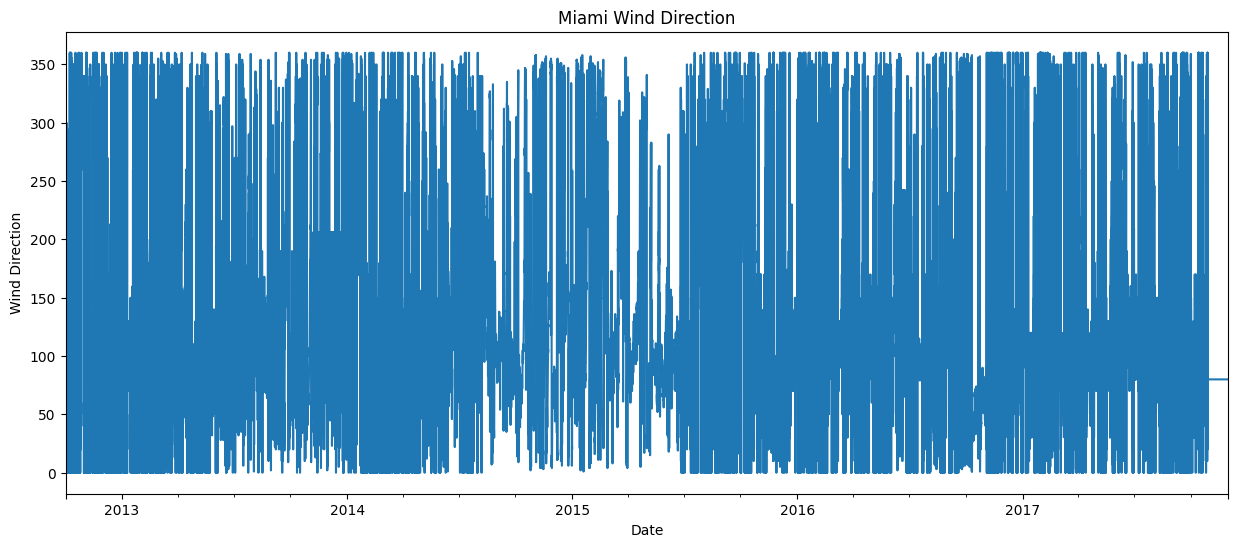

In [20]:
fig, ax = plt.subplots(figsize=(15, 6))
df['Wind_Direction'].plot(xlabel="Date", ylabel="Wind Direction", title="Miami Wind Direction", ax=ax);

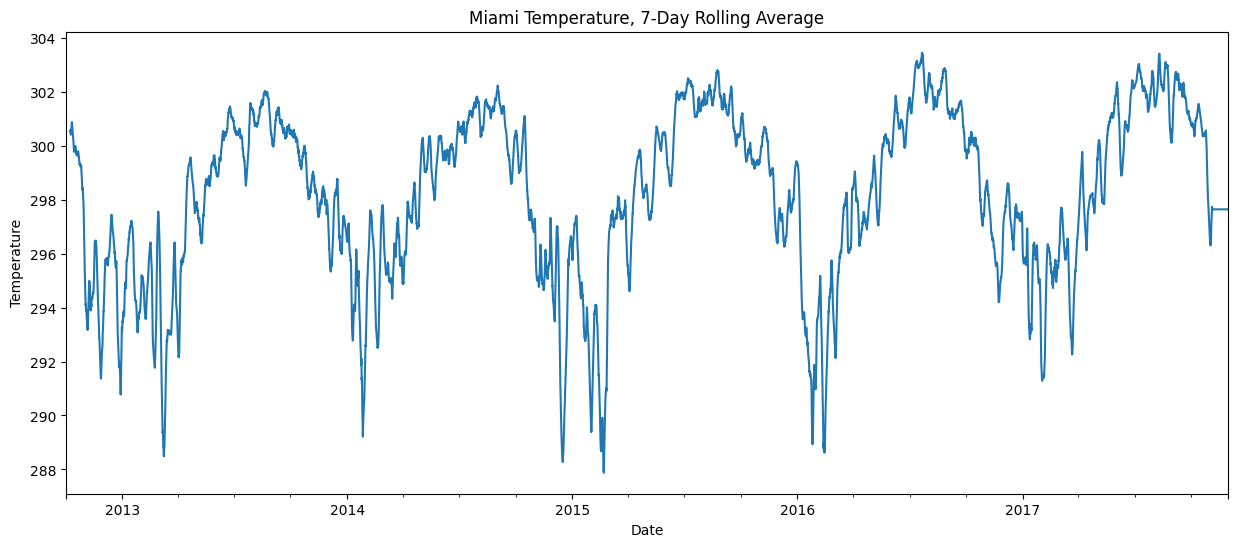

In [21]:
fig, ax = plt.subplots(figsize=(15, 6))

df['Temperature'].rolling(168).mean().plot(ax=ax, xlabel="Date", ylabel="Temperature", title="Miami Temperature, 7-Day Rolling Average");


## Building the Prediction Model

### PACF & ACF

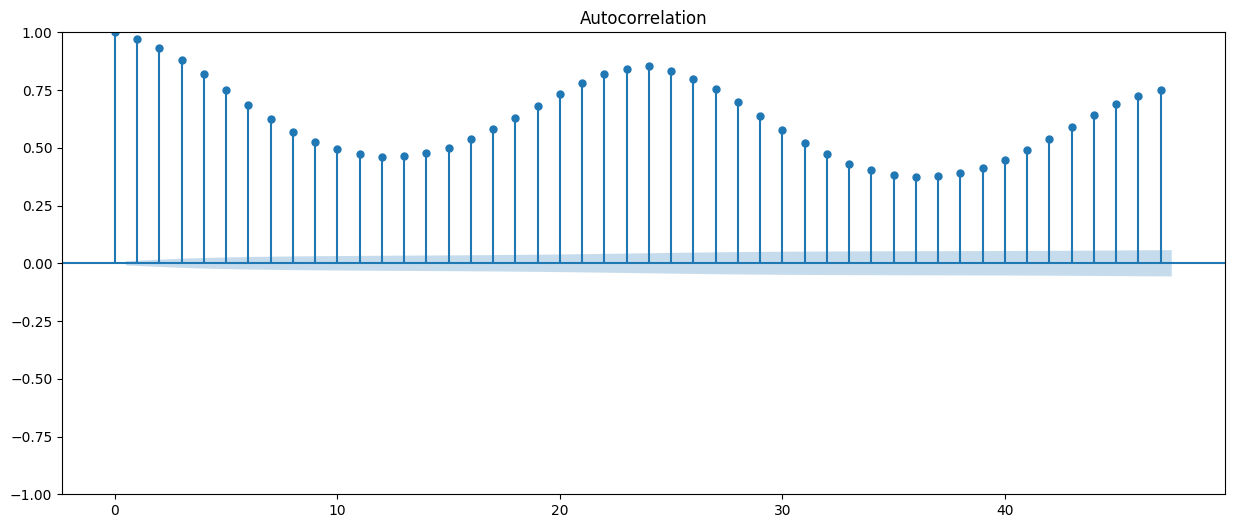

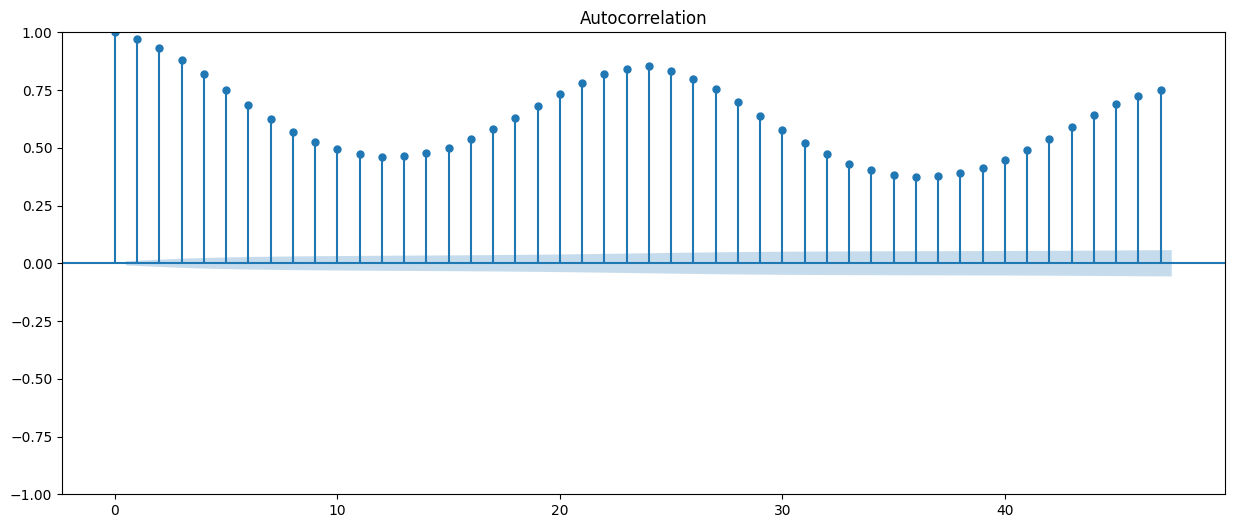

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(df['Temperature'], ax=ax)

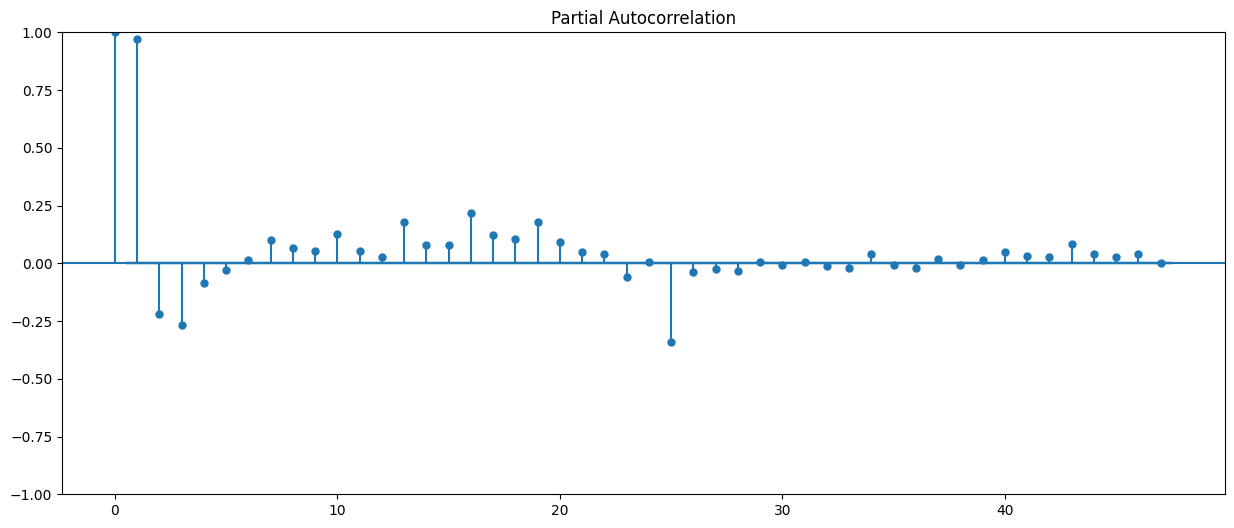

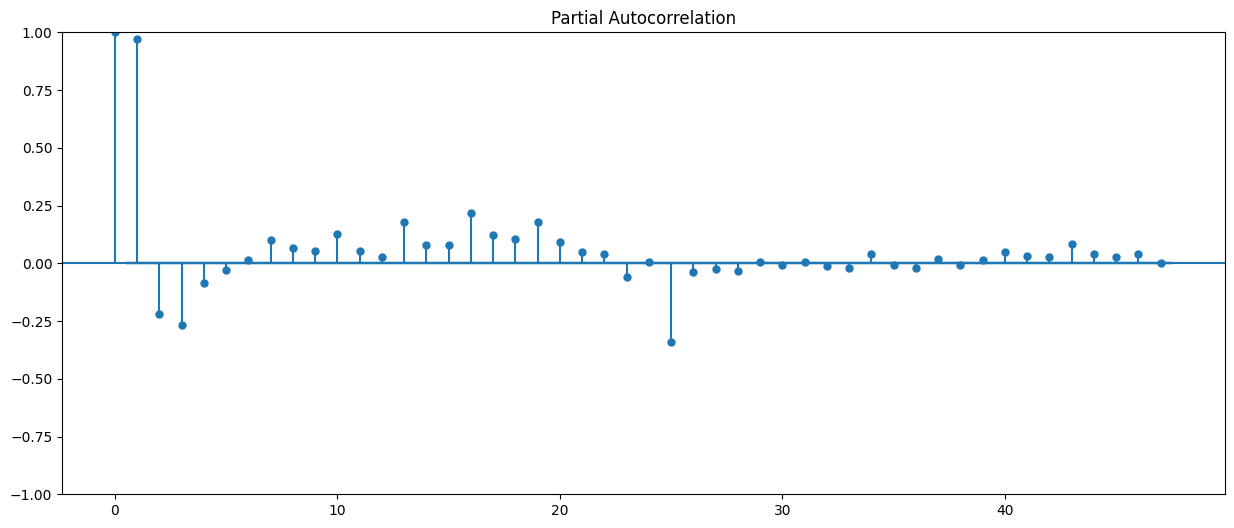

In [23]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(df['Temperature'], ax=ax)

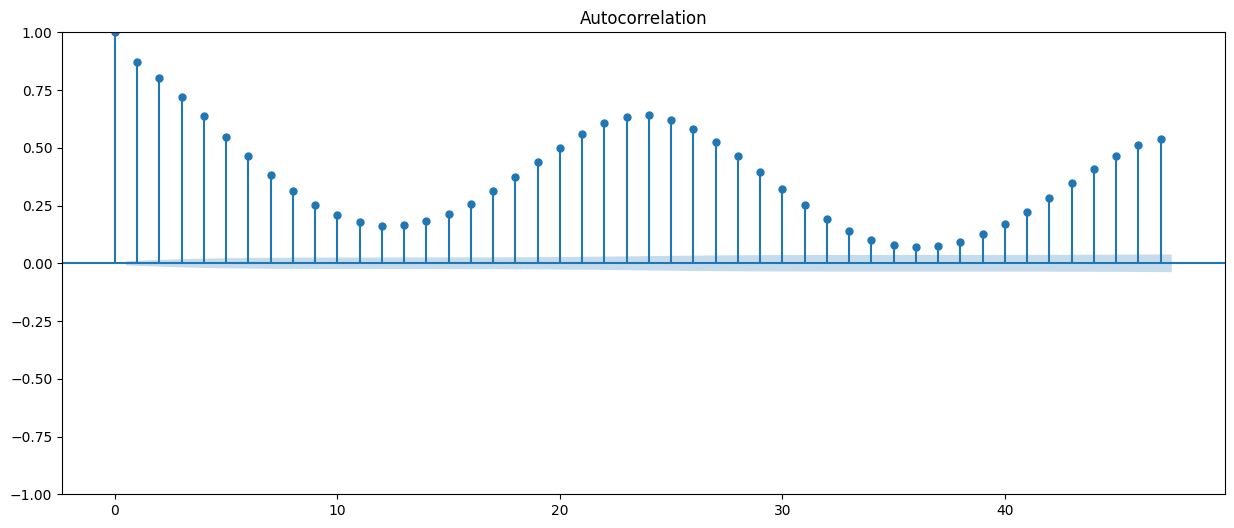

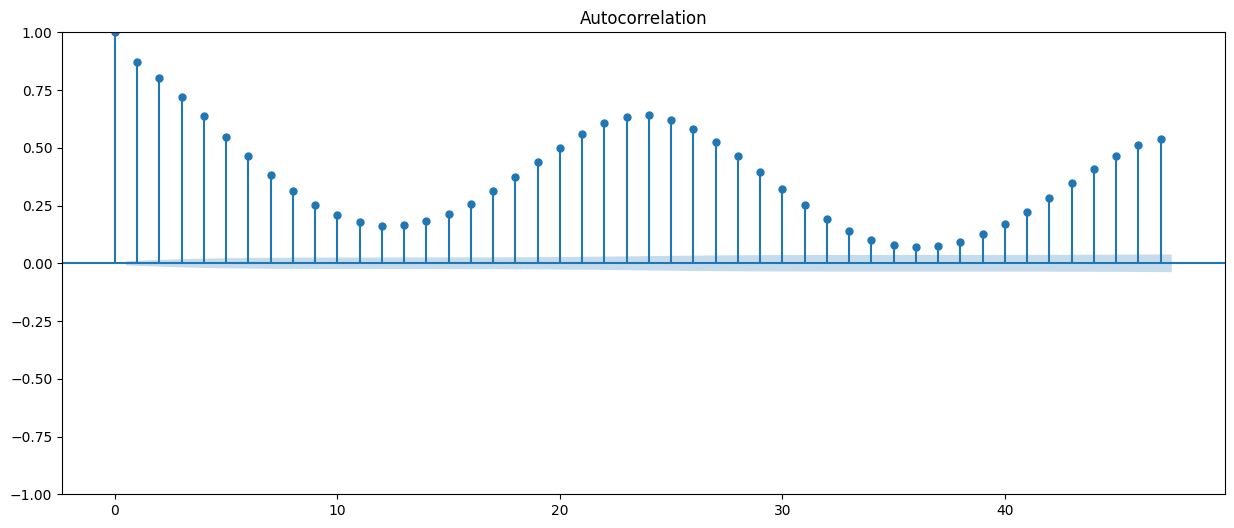

In [24]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(df['Humidity'], ax=ax)

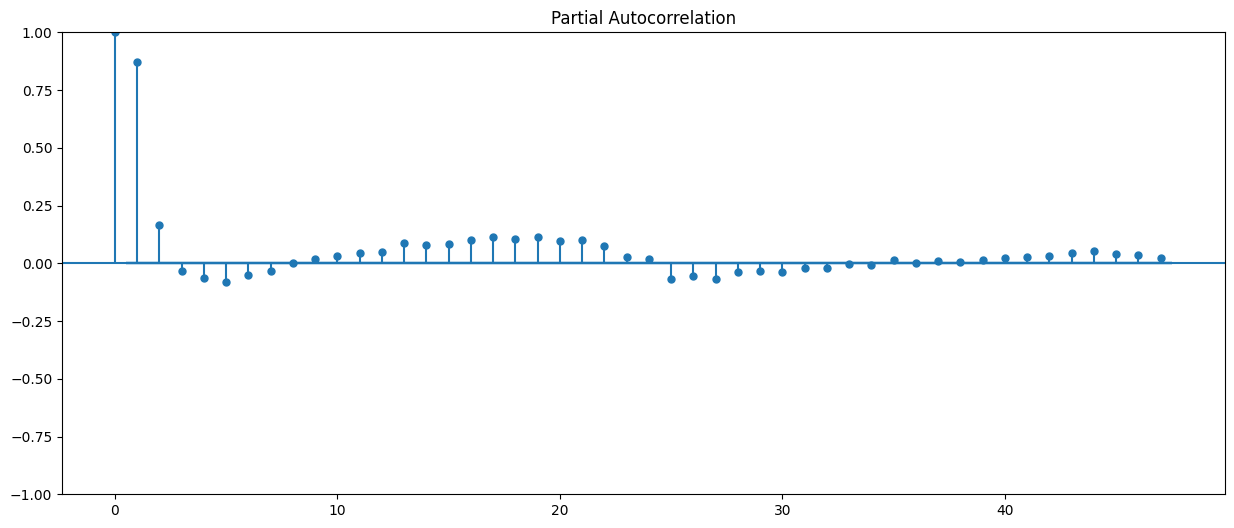

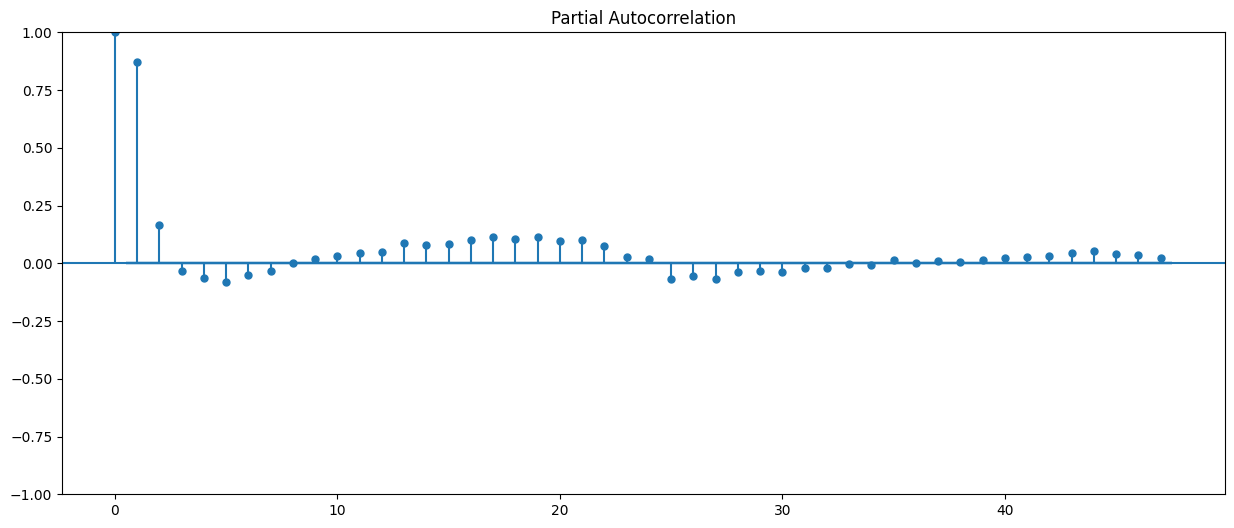

In [25]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(df['Humidity'], ax=ax)

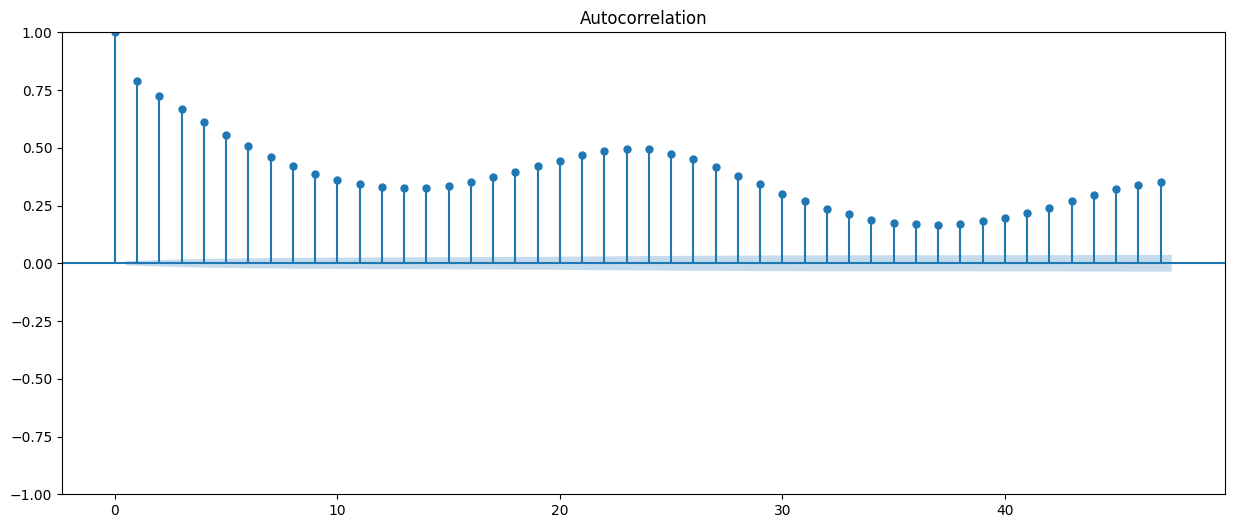

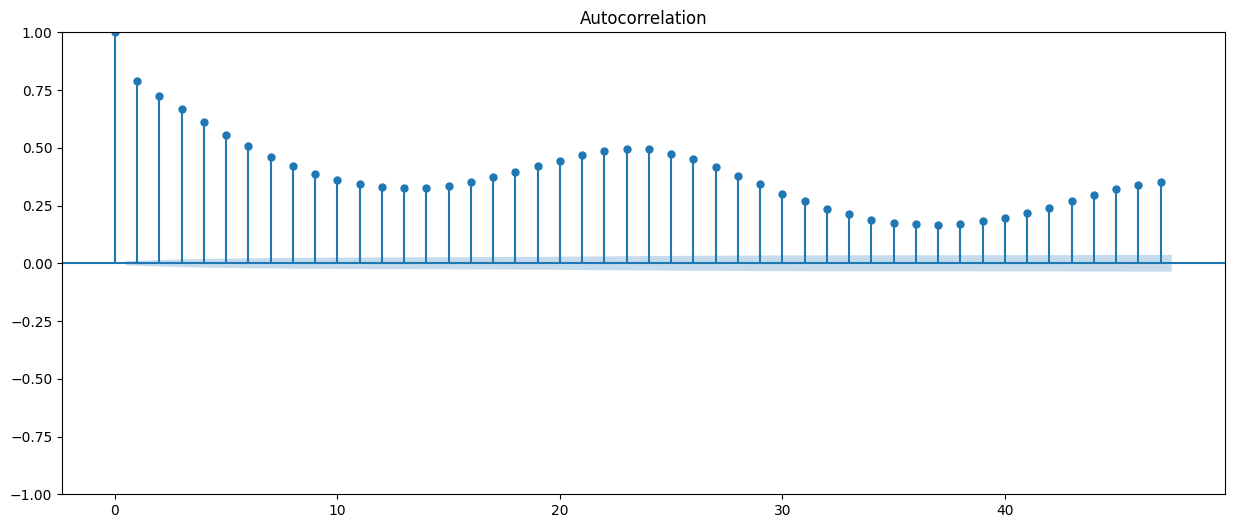

In [26]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(df['Wind_Speed'], ax=ax)

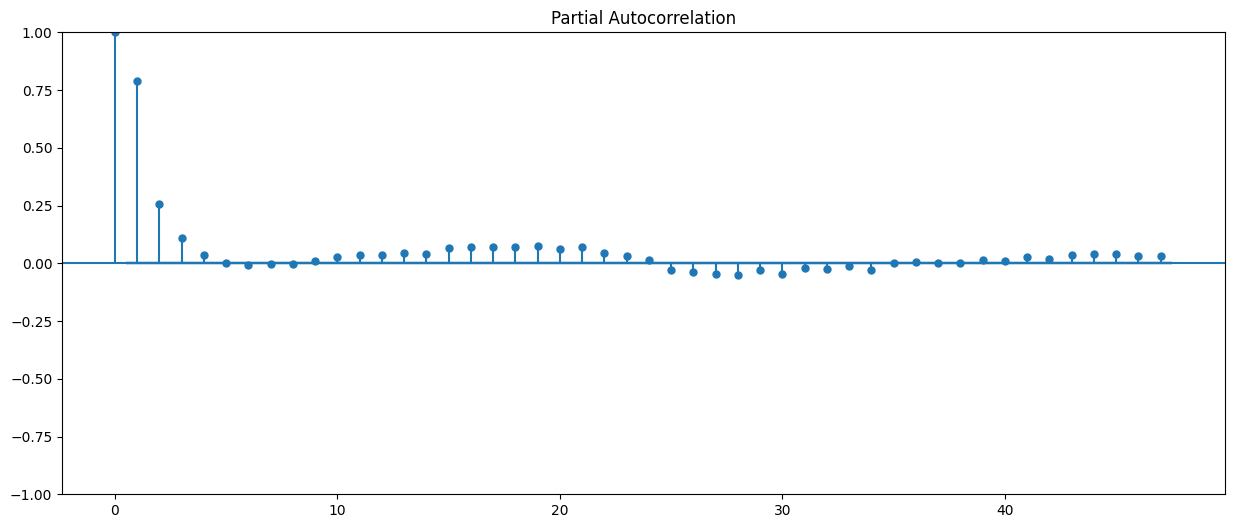

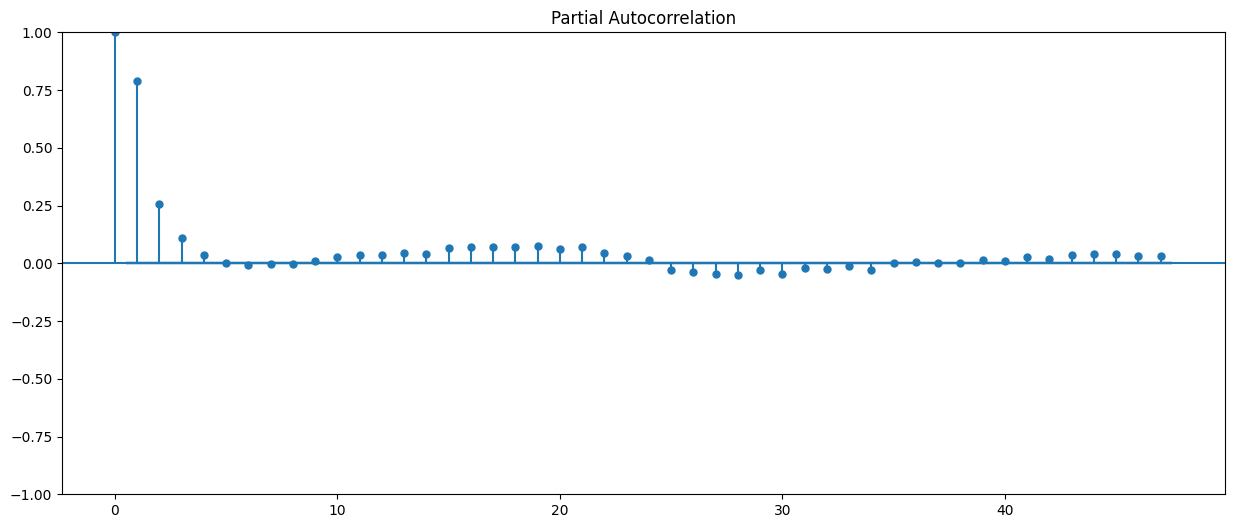

In [27]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(df['Wind_Speed'], ax=ax)

### Walk-forward Validation

In [28]:
from sklearn.model_selection import train_test_split
y_train,y_test = train_test_split(df,test_size = 0.004,shuffle=False)

In [29]:
len(y_test)

182

In [30]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error
import pandas as pd

p = 50
y_pred_wfv = pd.DataFrame(columns=['datetime','Temperature_wfv', 'Humidity_wfv','Pressure_wfv','Wind_Speed_wfv','Wind_Direction_wfv'])

history = y_train.copy()
for i in range(len(y_test)):
    model1 = AutoReg(history['Temperature'], lags=p).fit()
    tem = model1.forecast()[0]

    model2 = AutoReg(history['Humidity'], lags=p).fit()
    hum = model2.forecast()[0]
  
    model3 = AutoReg(history['Pressure'], lags=p).fit()
    pre = model3.forecast()[0]
 
    model4 = AutoReg(history['Wind_Speed'], lags=p).fit()
    ws = model4.forecast()[0]

    model5 = AutoReg(history['Wind_Direction'], lags=p).fit()
    wd = model5.forecast()[0]
    
    # Append forecasted values to y_pred_wfv DataFrame
    y_pred_wfv = y_pred_wfv._append({'datetime': y_test.index[i],
                                    'Temperature_wfv': tem,
                                    'Humidity_wfv': hum,
                                    'Pressure_wfv': pre,
                                    'Wind_Speed_wfv': ws,
                                    'Wind_Direction_wfv': wd}, 
                                    ignore_index=True)
    # y_pred_wfv = pd.concat([y_pred_wfv, pd.DataFrame([y_test.index[i],tem,hum,pre,ws,wd])] , ignore_index=True)
    
    # Update history for the next iteration
    history = history._append(y_test.iloc[i])


In [31]:
mae_Temp = mean_absolute_error(y_test['Temperature'],y_pred_wfv['Temperature_wfv']) 
mae_Hum = mean_absolute_error(y_test['Humidity'],y_pred_wfv['Humidity_wfv'])
mae_pre = mean_absolute_error(y_test['Pressure'],y_pred_wfv['Pressure_wfv'])
mae_ws = mean_absolute_error(y_test['Wind_Speed'], y_pred_wfv['Wind_Speed_wfv'])
mae_wd = mean_absolute_error(y_test['Wind_Direction'], y_pred_wfv['Wind_Direction_wfv'])
print('Temperature mean absolute error',mae_Temp)
print('Humidity mean absolute error',mae_Hum)
print('Pressure mean absolute error',mae_pre)
print('Wind Speed mean absolute error',mae_ws)
print('Wind Direction mean absolute error',mae_wd)


Temperature mean absolute error 0.005961444797580041
Humidity mean absolute error 0.8044469465215925
Pressure mean absolute error 0.06463979056526953
Wind Speed mean absolute error 0.18163624635155415
Wind Direction mean absolute error 7.377527698893287


In [37]:
y_pred_wfv['datetime'] = pd.to_datetime(y_pred_wfv['datetime'])
y_pred_wfv.set_index('datetime',inplace=True)
y_pred_wfv.head()

,Temperature_wfv,Humidity_wfv,Pressure_wfv,Wind_Speed_wfv,Wind_Direction_wfv
datetime,,,,,
2017-11-22 11:00:00,297.645974,57.812287,1015.064863,5.816383,87.412521
2017-11-22 12:00:00,297.645974,57.812199,1015.064861,5.816405,87.412131
2017-11-22 13:00:00,297.645973,57.812112,1015.064858,5.816427,87.411742
2017-11-22 14:00:00,297.645973,57.812024,1015.064856,5.816450,87.411353
2017-11-22 15:00:00,297.645973,57.811936,1015.064854,5.816472,87.410964


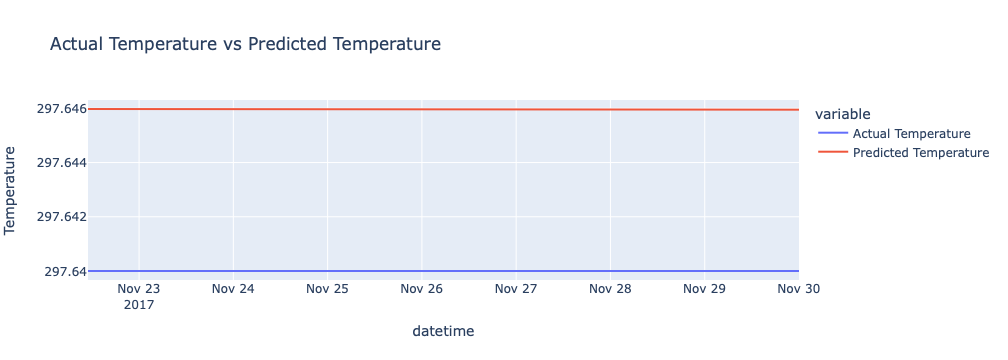

In [38]:
import plotly.express as px

# Assuming y_test and y_pred_wfv are DataFrames with 'Temperature' columns
temper = pd.DataFrame({'Actual Temperature': y_test['Temperature'], 'Predicted Temperature': y_pred_wfv['Temperature_wfv']})
fig = px.line(temper, x=temper.index, y=['Actual Temperature', 'Predicted Temperature'], title='Actual Temperature vs Predicted Temperature', labels={'index': 'Date', 'value': 'Temperature'})
fig.show()


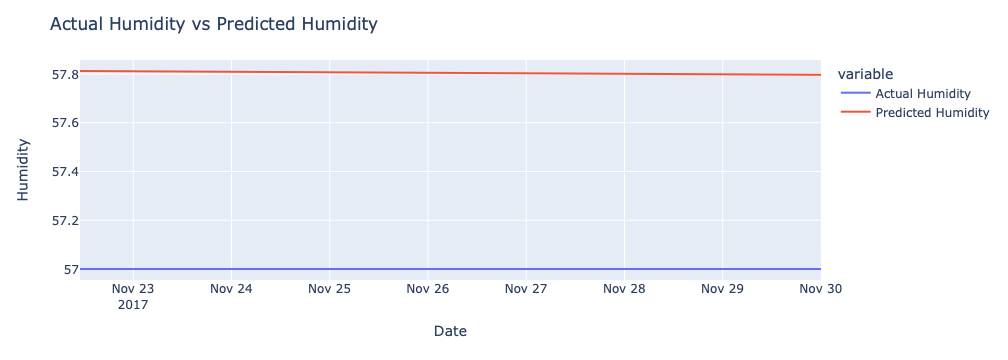

In [39]:
humid = pd.DataFrame({'Actual Humidity': y_test['Humidity'], 'Predicted Humidity':y_pred_wfv['Humidity_wfv']})
fig = px.line(humid)
fig.update_layout(title = 'Actual Humidity vs Predicted Humidity' , xaxis_title = 'Date', yaxis_title = 'Humidity')
fig.show()

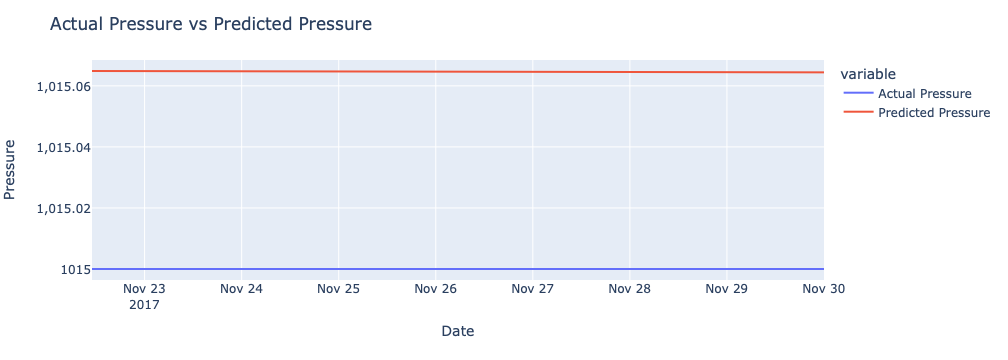

In [40]:
pres = pd.DataFrame({'Actual Pressure': y_test['Pressure'], 'Predicted Pressure':y_pred_wfv['Pressure_wfv']})
fig = px.line(pres)
fig.update_layout(title = 'Actual Pressure vs Predicted Pressure' , xaxis_title = 'Date', yaxis_title = 'Pressure')
fig.show()

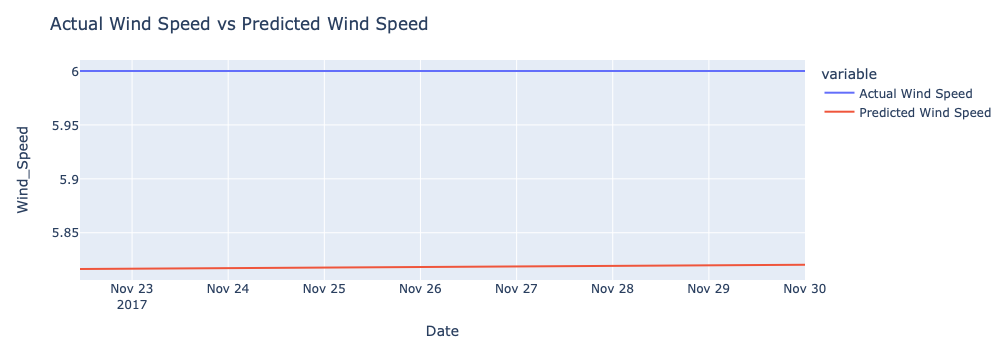

In [41]:
ws = pd.DataFrame({'Actual Wind Speed': y_test['Wind_Speed'], 'Predicted Wind Speed':y_pred_wfv['Wind_Speed_wfv']})
fig = px.line(ws)
fig.update_layout(title = 'Actual Wind Speed vs Predicted Wind Speed' , xaxis_title = 'Date', yaxis_title = 'Wind_Speed')
fig.show()

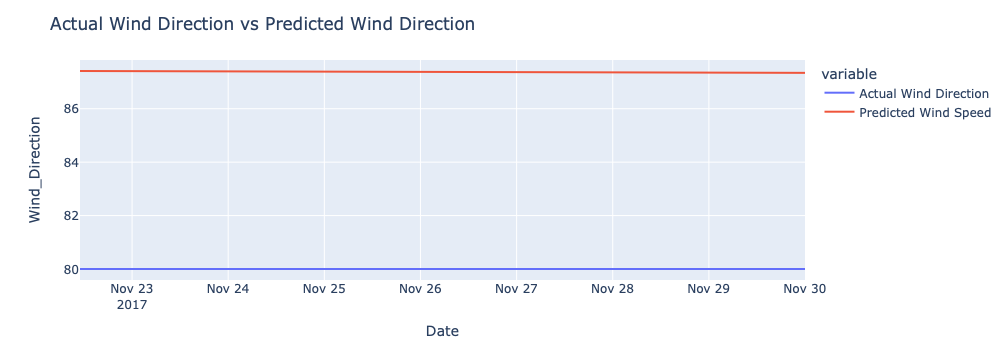

In [42]:
wd = pd.DataFrame({'Actual Wind Direction': y_test['Wind_Direction'], 'Predicted Wind Speed':y_pred_wfv['Wind_Direction_wfv']})
fig = px.line(wd)
fig.update_layout(title = 'Actual Wind Direction vs Predicted Wind Direction' , xaxis_title = 'Date', yaxis_title = 'Wind_Direction')
fig.show()